In [9]:
import librosa.display, librosa
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [16]:
data, fs = librosa.load('./data/train_audio/fatrav1/XC267910.ogg', sr=None) # data: x[n]
print(data.shape, fs)
print(f'time:{data.shape[0] / fs: .1f}s')

(393984,) 32000
time: 12.3s


## Waveform

Text(0.5, 1.0, 'Waveform')

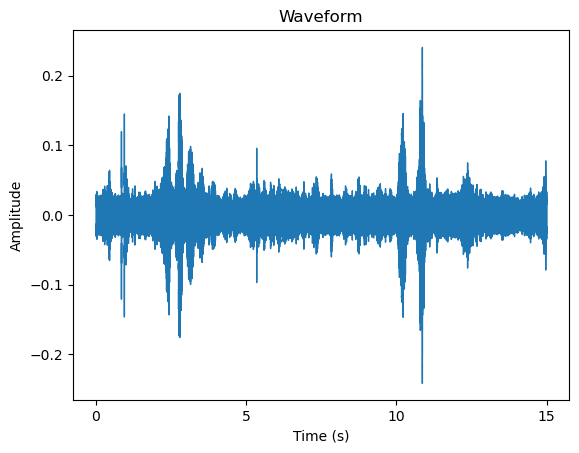

In [7]:
plt.figure()
librosa.display.waveshow(
    y=data,
    sr=fs
)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

# Fourier Spectrum

196992


Text(0.5, 1.0, 'Power spectrum')

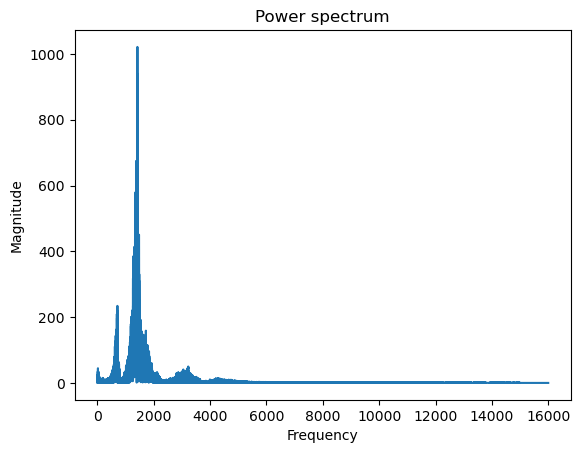

In [17]:
fft = np.fft.fft(data) # X[k]

magnitude = np.abs(fft)
f = np.linspace(0,fs,len(magnitude))

# Sampling theorem
half_spectrum = magnitude[:int(len(magnitude) / 2)]
half_f = f[:int(len(magnitude) / 2)]
print(len(half_f))

plt.figure()
plt.plot(half_f, half_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

# STFT

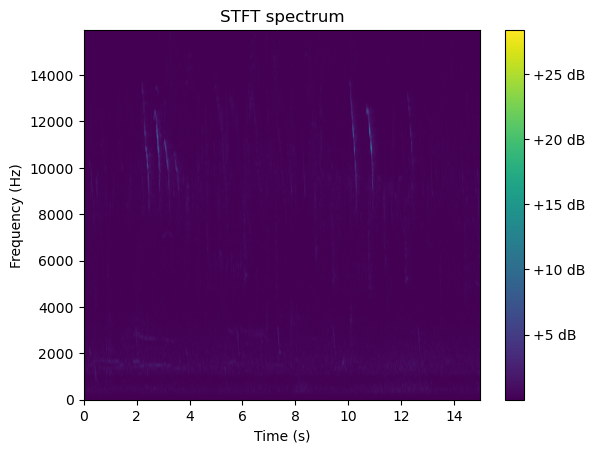

In [6]:
win_length = int(np.ceil(fs * 0.025))
nfft = 2 ** int(np.ceil(np.log2(win_length)))
hop_length = int(np.ceil(fs * 0.01))

stft = librosa.stft(
    data,
    n_fft=nfft,
    win_length=win_length,
    hop_length=hop_length
)

magnitude = np.abs(stft)

## Spectrogram

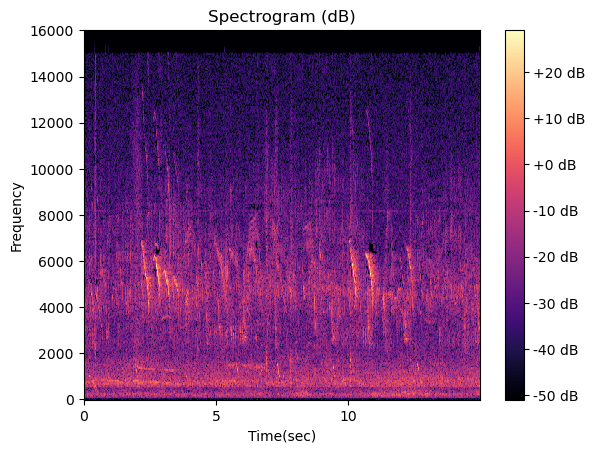

In [8]:
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(
    log_spectrogram,
    sr=fs,
    win_length = win_length,
    hop_length=hop_length,
    x_axis='time',
    y_axis='hz'
)
plt.xlabel("Time(sec)")
# plt.xlim(0, data.shape[0] / fs)
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

plt.show()